# Decision Tree Regressor

## imports

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval, format_for_model, export_models, export_models_with_joblib

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"

## perform experiment on entire normalized dataset

### load data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    tree_model = DecisionTreeRegressor()
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = tree_model

### inference plot and eval

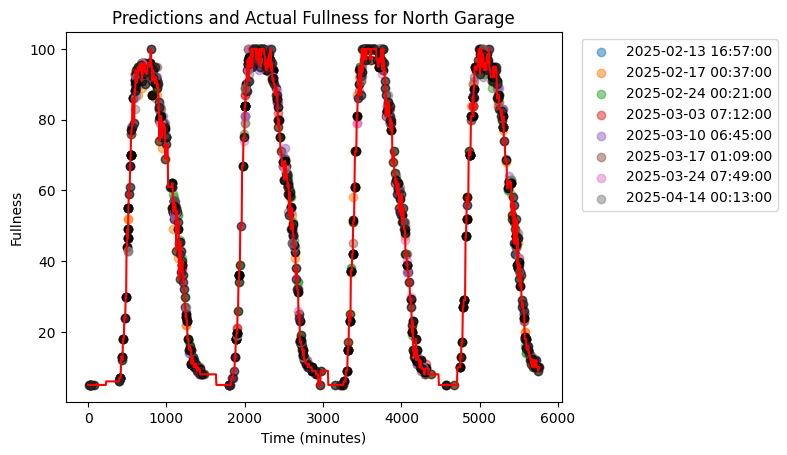

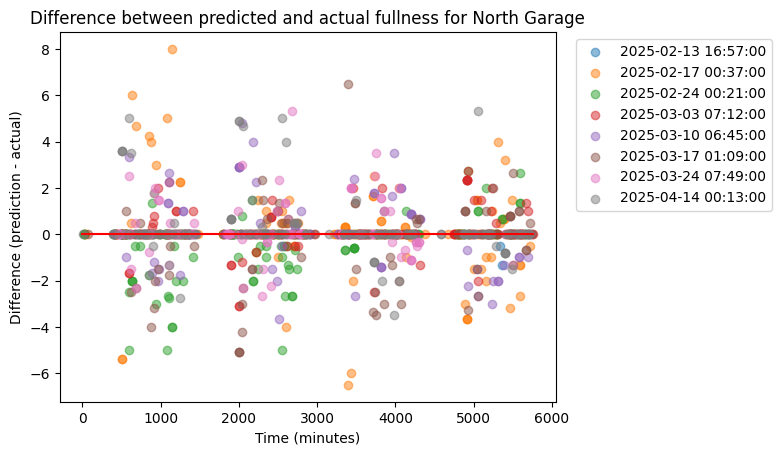

North Garage stats
r^2: 0.9983965639881497
rmse: 0.6494769295744905
mae: 1.337659055795333




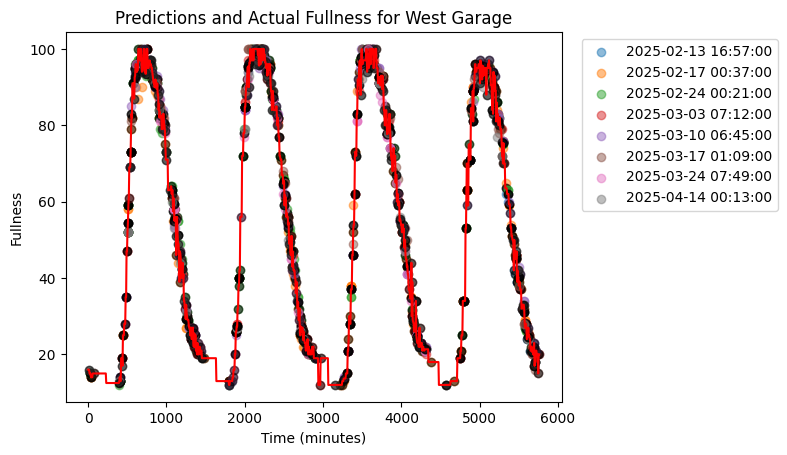

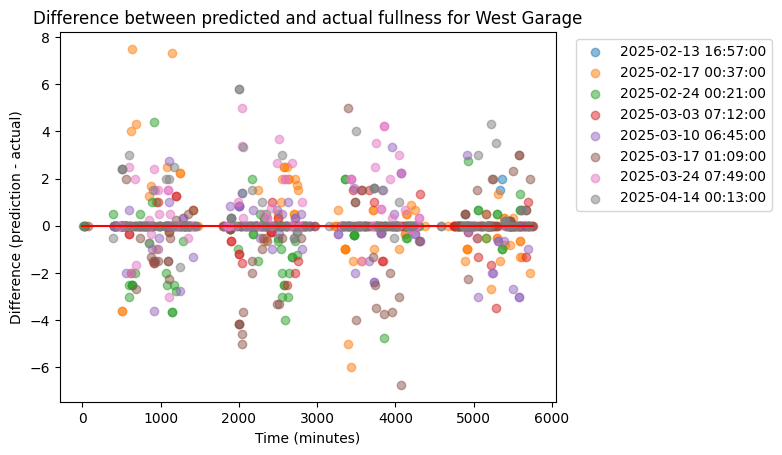

West Garage stats
r^2: 0.9982038286047415
rmse: 0.5879383010987708
mae: 1.241072652462731




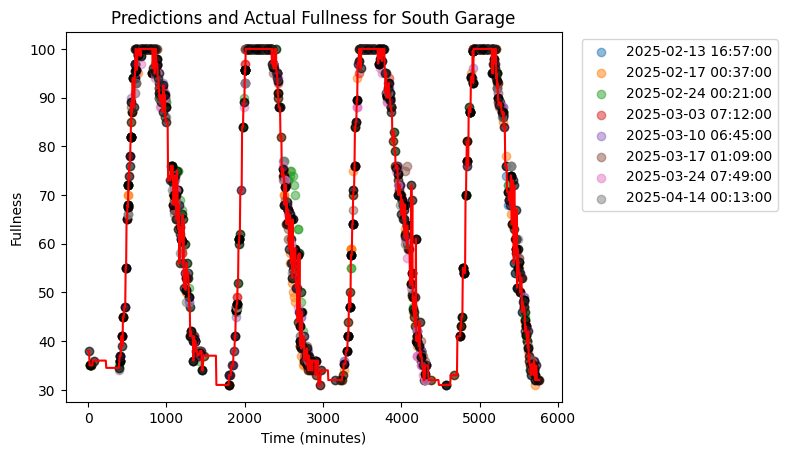

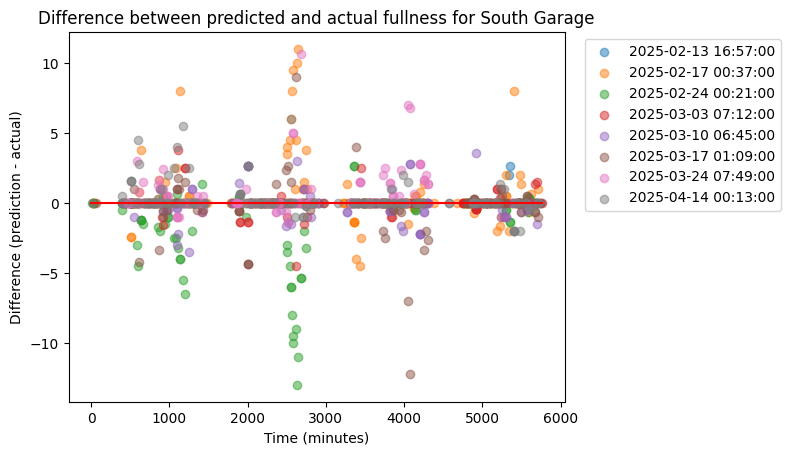

South Garage stats
r^2: 0.9951220723304687
rmse: 0.662666525886038
mae: 1.7077574078580073




In [5]:
for garage in garage_models:
    formatted_x_data = [format_for_model(s.to_list()) for s in garage_data[garage][0]]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, garage_data[garage][1], garage_models[garage].predict)



## partitioned experiment

### load data

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [7]:
# keys are each garage with value being params or list of weights made
garage_partition_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_training_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_training_data[garage][1]))
    tree_model = DecisionTreeRegressor()
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_partition_models[garage] = tree_model

### inference, plot, and stats

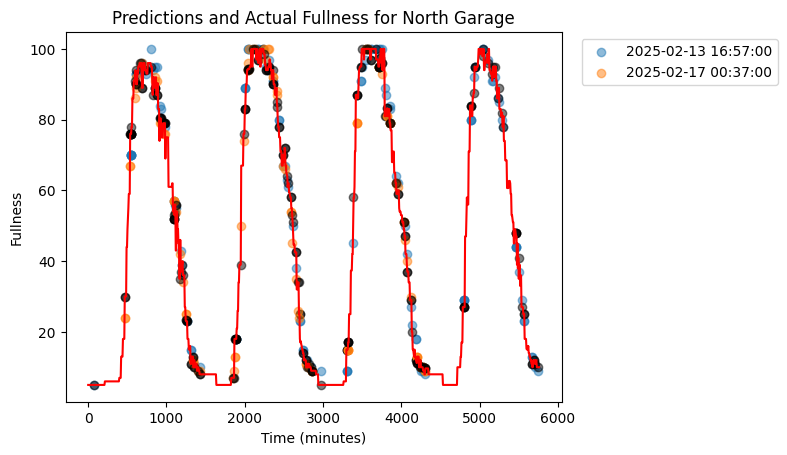

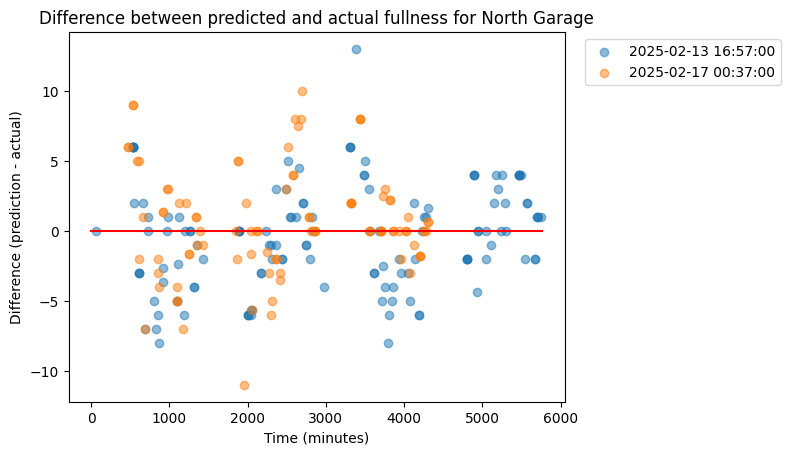

North Garage stats
r^2: 0.9876051122548007
rmse: 2.8933333333333335
mae: 3.813344228219969




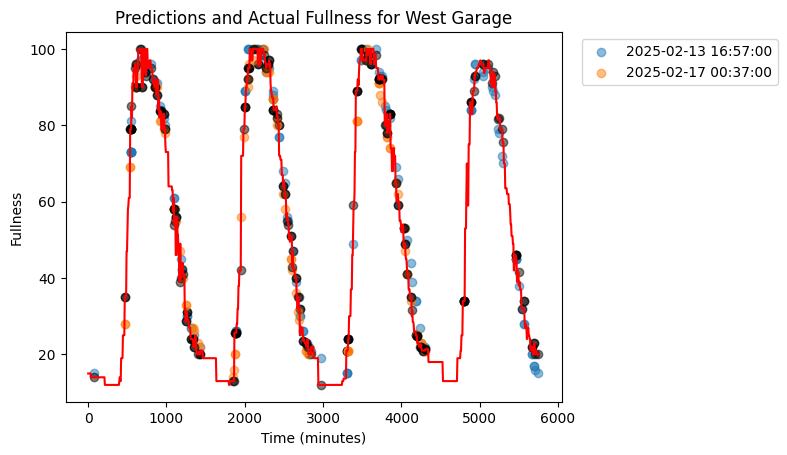

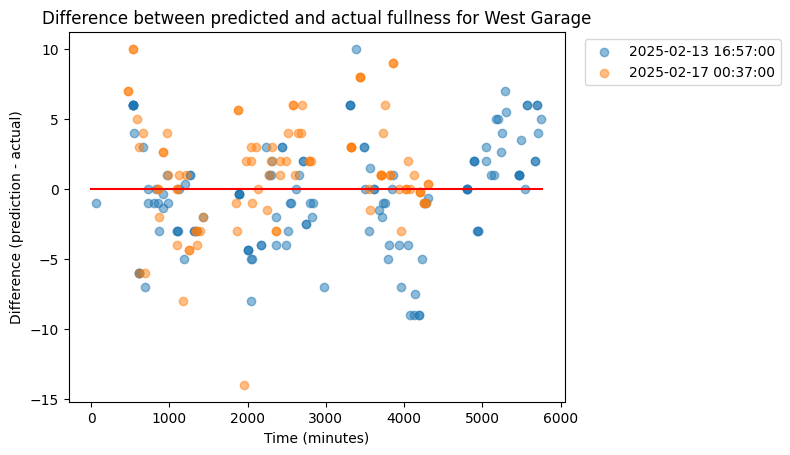

West Garage stats
r^2: 0.9815869143125651
rmse: 3.0694566813509545
mae: 4.009858751264257




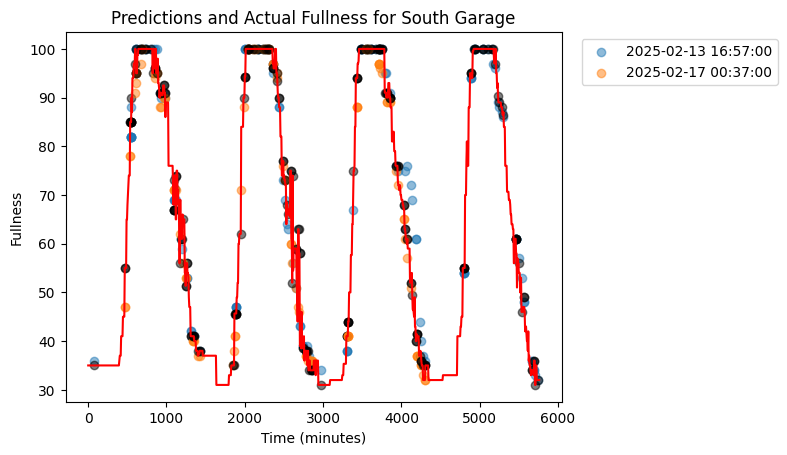

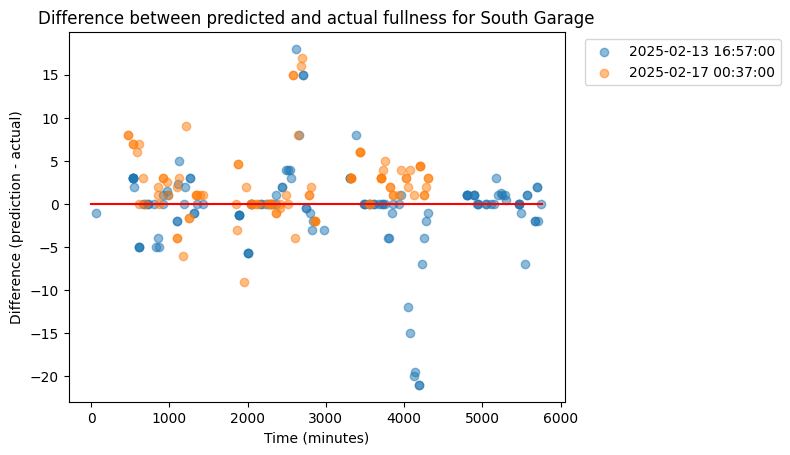

South Garage stats
r^2: 0.9591154084513464
rmse: 2.923333333333333
mae: 4.996784956687815




In [8]:
for garage in garage_partition_models.keys():
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    formatted_x_data = [format_for_model(s.to_list()) for s in x_data]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, y_data, garage_partition_models[garage].predict)



## export models

In [10]:
export_models("decision_tree", garage_models, garage_partition_models)
export_models_with_joblib("decision_tree", garage_models, garage_partition_models)

wrote fully trained models
wrote partition trained models
wrote fully trained models with joblib
wrote partition trained models with joblib
